# Importing Necessary Libraries

In [17]:
    #1.Pandas for dataframe
import pandas as pd

    #2. NumPy to peform Calculations
import numpy as np

    #3. For Plotting graph
import matplotlib.pyplot as plt

    #4. Seaborn to Visualize data
import seaborn as sns
    # Setting dimensions for plot
sns.set(rc={'figure.figsize':(5.7,3.27)})

# Pre processing data

In [3]:
  #Importing Data:
data_wine= pd.read_csv('/content/Wine_reviews.csv')

  #Creating Copy:
df=data_wine.copy()

  #Printing top 5 entries
print(df.head())

     0   country                                        description  \
0  1.0     Italy  Aromas include tropical fruit, broom, brimston...   
1  2.0  Portugal  This is ripe and fruity, a wine that is smooth...   
2  3.0        US  Tart and snappy, the flavors of lime flesh and...   
3  4.0        US  Pineapple rind, lemon pith and orange blossom ...   
4  5.0        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                       VulkÃ  Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN     Kerin Oâ€™K

Dealing with NULL or NaN values

In [4]:
  #Printing total NULL values of each column
print(df.isnull().sum())

0                          1
country                    1
description                0
designation              327
points                     0
price                     68
province                   1
region_1                 213
region_2                 800
taster_name              248
taster_twitter_handle    301
title                      0
variety                    0
winery                     1
dtype: int64


In [13]:
  # Dropping unwanted columns
df=df.drop(columns=['0'], axis=1)
df.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                1274 non-null   object 
 1   description            1275 non-null   object 
 2   designation            948 non-null    object 
 3   points                 1275 non-null   int64  
 4   price                  1207 non-null   float64
 5   province               1274 non-null   object 
 6   region_1               1062 non-null   object 
 7   region_2               475 non-null    object 
 8   taster_name            1027 non-null   object 
 9   taster_twitter_handle  974 non-null    object 
 10  title                  1275 non-null   object 
 11  variety                1275 non-null   object 
 12  winery                 1274 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 129.6+ KB


In [29]:
#Droping rows of particular columns with only few NULL values
df['country'].dropna(inplace=True)
df['province'].dropna(inplace=True)
df['winery'].dropna(inplace=True)

In [14]:
  # Summarizing data
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,points,price
count,1275.000,1207.000
mean,88.514,36.737
std,2.774,43.625
min,80.000,7.000
25%,87.000,17.000
50%,88.000,26.000
75%,90.000,44.000
max,100.000,775.000


In [30]:
  #Imputing Data with Mean Value
df_imputed=df.apply(lambda x:x.fillna(x.median()) \
                  if x.dtype=='float' else \
                  x.fillna(x.value_counts().index[0]))
df_imputed.isnull().sum()

country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
dtype: int64

Scatter Plot-
Filtering 30<'price'<100

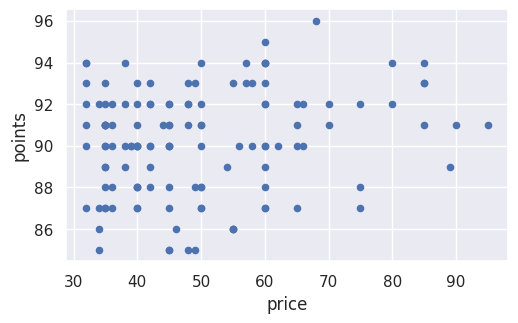

In [39]:
df=df_imputed
df[(df['price']>30) & (df['price'] <100)].sample(130).plot.scatter(x='price', y='points')
plt.show()

Histogram

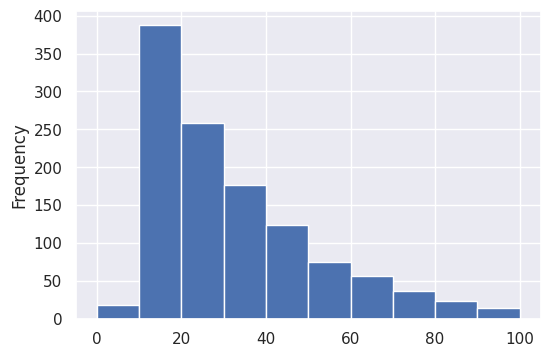

In [32]:
df.price.plot.hist(bins=10,range=(0,100),figsize=(6,4))
plt.show()

In [33]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

First five country with highests wine review

In [34]:
df.country.value_counts().head()

country
US        515
Italy     234
France    187
Spain      52
Chile      51
Name: count, dtype: int64

Wine Activity by country

<ipython-input-35-f73c64009ff3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='country',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7),order=df['country'].value_counts().head(10).index)


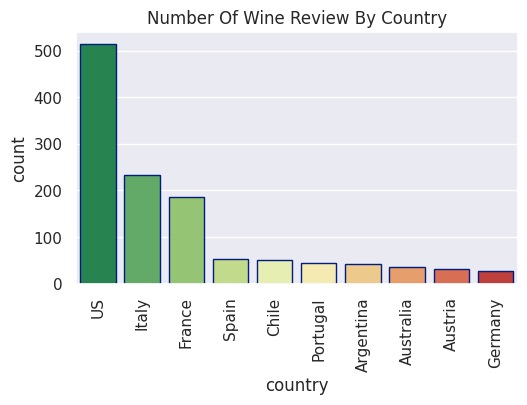

In [35]:
sns.countplot(x='country',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7),order=df['country'].value_counts().head(10).index)
plt.xticks(rotation=90)
plt.title('Number Of Wine Review By Country')
plt.show()

**Top 5 wine taster for wine review**

In [36]:
df.taster_name.value_counts().head()

taster_name
Roger Voss           224
Michael Schachner    145
Virginie Boone       114
Kerin Oâ€™Keefe      104
Paul Gregutt          90
Name: count, dtype: int64

<ipython-input-37-6ba10736a123>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='taster_name',data=df,palette= 'plasma_r',edgecolor=sns.color_palette('dark',7),order=df['taster_name'].value_counts().index)


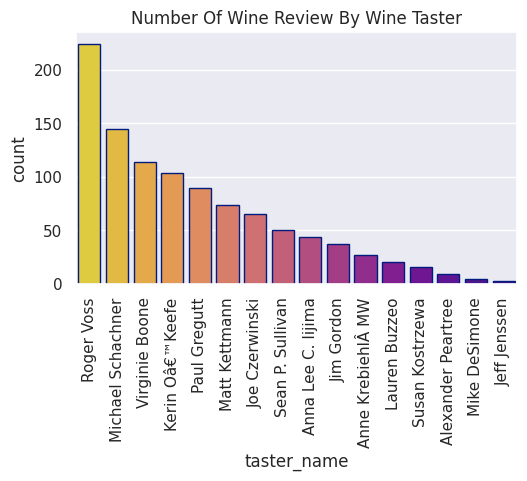

In [37]:
  #countplot for taster
sns.countplot(x='taster_name',data=df,palette= 'plasma_r',edgecolor=sns.color_palette('dark',7),order=df['taster_name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Wine Review By Wine Taster')
plt.show()

In [38]:
  #melt data
melted_data=pd.melt(frame=df,id_vars='country',value_vars=['province','region_1'])
melted_data

,country,variable,value
0,Italy,province,Sicily & Sardinia
1,Portugal,province,Douro
2,US,province,Oregon
3,US,province,Michigan
4,US,province,Oregon
...,...,...,...
2545,US,region_1,Napa Valley
2546,US,region_1,Lodi
2547,Italy,region_1,Sicilia
2548,US,region_1,Russian River Valley


**Sentiment Analysis of Reviews**

In [40]:
df['Review-Sentiment'] = float('nan')

In [42]:
#Sentiment Analysis of Review
import nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

for val in df['description']:
  # Tokenize the text
  tokens = word_tokenize(val)

  # Remove stopwords
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

  # Join tokens back into a sentence
  cleaned_text = ' '.join(lemmatized_tokens)

  # Perform sentiment analysis
  scores = sid.polarity_scores(cleaned_text)

  # Classify sentiment based on compound score
  if scores['compound'] >= 0.05:
      df.loc[df['description'] == val, 'Review-Sentiment'] = 'Positive'
  elif scores['compound'] <= -0.05:
      df.loc[df['description'] == val, 'Review-Sentiment'] = 'Negative'
  else:
      df.loc[df['description'] == val, 'Review-Sentiment'] = 'Neutral'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [43]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,Review-Sentiment
0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,26.000,Sicily & Sardinia,Etna,Central Coast,Kerin Oâ€™Keefe,@kerinokeefe,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Quinta dos Avidagos,Positive
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000,Douro,Napa Valley,Central Coast,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Rainstorm,Positive
2,US,"Tart and snappy, the flavors of lime flesh and...",Reserve,87,14.000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,St. Julian,Negative
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000,Michigan,Lake Michigan Shore,Central Coast,Alexander Peartree,@vossroger,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,Sweet Cheeks,Positive
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Tandem,Positive


New column with sentiment of review is added to the data frame.